In [1]:
# https://towardsdatascience.com/anomaly-detection-with-generalized-extreme-studentized-deviate-in-python-f350075900e2
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Example Data 생성

y=np.random.random(100)
x=np.arange(len(y))

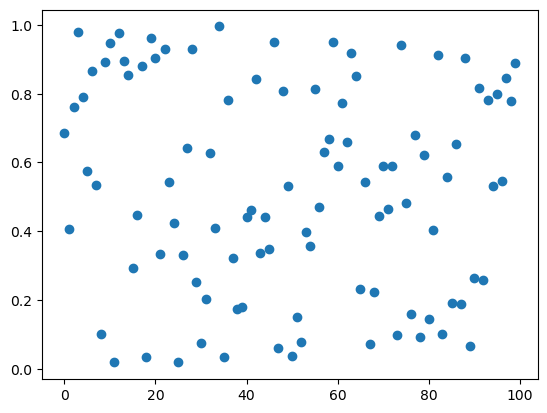

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
# test static 계산하는 함수

def test_stat(y, iteration):
    std_dev=np.std(y)
    avg_y=np.mean(y)
    abs_val_minus_avg=abs(y-avg_y)
    max_of_deviations=max(abs_val_minus_avg)
    max_ind=np.argmax(abs_val_minus_avg)
    cal=max_of_deviations/std_dev
    print('Test Statistic Value(R{}): {}'.format(iteration,cal))
    return cal, max_ind

# Critical Value 계산하는 함수

def calculate_critical_value(size, alpha, iteration):
    t_dist=stats.t.ppf(1-alpha/(2*size),size-2)
    numerator=(size-1)*np.sqrt(np.square(t_dist))
    denominator=np.sqrt(size)*np.sqrt(size-2+np.square(t_dist))
    critical_value=numerator/denominator
    print('Critical Value(λ{}):{}'.format(iteration, critical_value))
    return critical_value

def check_values(R, C, inp, max_index, iteration):
    if R > C:
        print('{} is an outlier. R{} > λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))
    else:
        print('{} is not an outlier. R{}> λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))

#GESD test 하는 함수

def ESD_Test(input_series, alpha, max_outliers):
    stats=[]
    critical_vals=[]
    max_i=0
    for iterations in range(1, max_outliers+1):
        stat, max_index=test_stat(input_series, iterations)
        critical=calculate_critical_value(len(input_series),alpha,iterations)
        check_values(stat, critical, input_series, max_index, iterations)
        input_series=np.delete(input_series, max_index)
        critical_vals.append(critical)
        stats.append(stat)
        if stat>critical:
            max_i=iterations


    df=pd.DataFrame({'i':range(1,max_outliers+1),'Ri':stats,'λi':critical_vals})

    def highlight_max(x):
        if x.i==max_i:
            return['background-color: yellow']*3
        else:
            return['background-color:white']*3

    df.index=df.index+1
    print('Number of outliers {}'.format(max_i))

    return df.style.apply(highlight_max, axis=1)

In [6]:
# Critical Value 계산하는 함수

def calculate_critical_value(size, alpha, iteration):
    t_dist=stats.t.ppf(1-alpha/(2*size),size-2)
    numerator=(size-1)*np.sqrt(np.square(t_dist))
    denominator=np.sqrt(size)*np.sqrt(size-2+np.square(t_dist))
    critical_value=numerator/denominator
    print('Critical Value(λ{}):{}'.format(iteration, critical_value))
    return critical_value

In [7]:
def check_values(R, C, inp, max_index, iteration):
    if R > C:
        print('{} is an outlier. R{} > λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))
    else:
        print('{} is not an outlier. R{}> λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))

In [8]:
#GESD test 하는 함수

def ESD_Test(input_series, alpha, max_outliers):
    stats=[]
    critical_vals=[]
    max_i=0
    for iterations in range(1, max_outliers+1):
        stat, max_index=test_stat(input_series, iterations)
        critical=calculate_critical_value(len(input_series),alpha,iterations)
        check_values(stat, critical, input_series, max_index, iterations)
        input_series=np.delete(input_series, max_index)
        critical_vals.append(critical)
        stats.append(stat)
        if stat>critical:
            max_i=iterations
            
    
    df=pd.DataFrame({'i':range(1,max_outliers+1),'Ri':stats,'λi':critical_vals})
    
    def highlight_max(x):
        if x.i==max_i:
            return['background-color: yellow']*3
        else:
            return['background-color:white']*3
        
    df.index=df.index+1
    print('Number of outliers {}'.format(max_i))
    
    return df.style.apply(highlight_max, axis=1)

In [9]:
ESD_Test(y,0.05,7)

Test Statistic Value(R1): 1.674276216108341
Critical Value(λ1):3.3840829011549163
0.01815840948667491 is not an outlier. R1> λ1: 1.6743 > 3.3841 

Test Statistic Value(R2): 1.6988831236078232
Critical Value(λ2):3.3806505075603503
0.020606333309119873 is not an outlier. R2> λ2: 1.6989 > 3.3807 

Test Statistic Value(R3): 1.6922549642666627
Critical Value(λ3):3.377175980782947
0.032767954799713284 is not an outlier. R3> λ3: 1.6923 > 3.3772 

Test Statistic Value(R4): 1.7177395325739984
Critical Value(λ4):3.3736583400522497
0.035381245970183994 is not an outlier. R4> λ4: 1.7177 > 3.3737 

Test Statistic Value(R5): 1.7490034514087587
Critical Value(λ5):3.370096570986626
0.03678338120393554 is not an outlier. R5> λ5: 1.7490 > 3.3701 

Test Statistic Value(R6): 1.7081661371291548
Critical Value(λ6):3.3664896240676505
0.05950698728150161 is not an outlier. R6> λ6: 1.7082 > 3.3665 

Test Statistic Value(R7): 1.721572055957771
Critical Value(λ7):3.362836413028039
0.06603583247516753 is not an o

,i,Ri,λi
1,1,1.674276,3.384083
2,2,1.698883,3.380651
3,3,1.692255,3.377176
4,4,1.717740,3.373658
5,5,1.749003,3.370097
6,6,1.708166,3.366490
7,7,1.721572,3.362836


In [10]:
y[14] = 9
y[83] = 10
y[44] = 14

In [11]:
ESD_Test(y,0.05,7)

Test Statistic Value(R1): 7.115053381291112
Critical Value(λ1):3.3840829011549163
14.0 is an outlier. R1 > λ1: 7.1151 > 3.3841 

Test Statistic Value(R2): 7.15132447076631
Critical Value(λ2):3.3806505075603503
10.0 is an outlier. R2 > λ2: 7.1513 > 3.3807 

Test Statistic Value(R3): 9.287315811048508
Critical Value(λ3):3.377175980782947
9.0 is an outlier. R3 > λ3: 9.2873 > 3.3772 

Test Statistic Value(R4): 1.6822187185565025
Critical Value(λ4):3.3736583400522497
0.01815840948667491 is not an outlier. R4> λ4: 1.6822 > 3.3737 

Test Statistic Value(R5): 1.7082632111611018
Critical Value(λ5):3.370096570986626
0.020606333309119873 is not an outlier. R5> λ5: 1.7083 > 3.3701 

Test Statistic Value(R6): 1.7031557121301066
Critical Value(λ6):3.3664896240676505
0.032767954799713284 is not an outlier. R6> λ6: 1.7032 > 3.3665 

Test Statistic Value(R7): 1.730319001294047
Critical Value(λ7):3.362836413028039
0.035381245970183994 is not an outlier. R7> λ7: 1.7303 > 3.3628 

Number of outliers 3


,i,Ri,λi
1,1,7.115053,3.384083
2,2,7.151324,3.380651
3,3,9.287316,3.377176
4,4,1.682219,3.373658
5,5,1.708263,3.370097
6,6,1.703156,3.366490
7,7,1.730319,3.362836


In [12]:
mydata = np.array([-0.25, 0.68, 0.94, 1.15, 1.2, 1.26, 1.26, 1.34,
    1.38, 1.43, 1.49, 1.49, 1.55, 1.56, 1.58, 1.65, 1.69, 1.7, 1.76,
    1.77, 1.81, 1.91, 1.94, 1.96, 1.99, 2.06, 2.09, 2.1, 2.14, 2.15,
    2.23, 2.24, 2.26, 2.35, 2.37, 2.4, 2.47, 2.54, 2.62, 2.64, 2.9,
    2.92, 2.92, 2.93, 3.21, 3.26, 3.3, 3.59, 3.68, 4.3, 4.64, 5.34,
    5.42, 6.01])

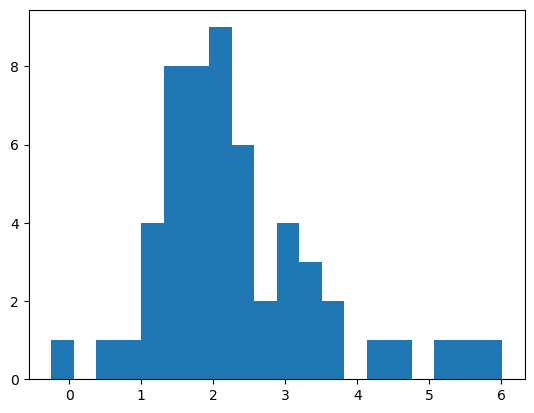

In [13]:
plt.hist(mydata, bins = 20)
#plt.hist(mydata, bins = [-2, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.6])
plt.show()

In [14]:
ESD_Test(mydata,0.05,5)

Test Statistic Value(R1): 3.148192194297463
Critical Value(λ1):3.1587939408872967
6.01 is not an outlier. R1> λ1: 3.1482 > 3.1588 

Test Statistic Value(R2): 2.9711361774720038
Critical Value(λ2):3.1514300233157844
5.42 is not an outlier. R2> λ2: 2.9711 > 3.1514 

Test Statistic Value(R3): 3.2104434413866363
Critical Value(λ3):3.14388968503173
5.34 is an outlier. R3 > λ3: 3.2104 > 3.1439 

Test Statistic Value(R4): 2.838143834583844
Critical Value(λ4):3.136164956057485
4.64 is not an outlier. R4> λ4: 2.8381 > 3.1362 

Test Statistic Value(R5): 2.8441648604024397
Critical Value(λ5):3.1282473343306387
-0.25 is not an outlier. R5> λ5: 2.8442 > 3.1282 

Number of outliers 3


,i,Ri,λi
1,1,3.148192,3.158794
2,2,2.971136,3.151430
3,3,3.210443,3.143890
4,4,2.838144,3.136165
5,5,2.844165,3.128247
